In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
university = pd.read_csv('degrees-that-pay-back.csv')

In [3]:
def change_to_float(value):
    for columns in university.iloc[:, 1:]:
        if university[columns].dtype==object:
            university[columns] = university[columns].str.replace('[\$\,]', "").astype(float)

In [4]:
change_to_float(university)

The histogram below shows the range of salaries for 50 different careers. This data is only for salaries that are in the 90th Percentile during the Mid-Career of the various professions. From the data, it can be gathered that the majority of salaries center around $100,000 and $150,000 respectively. 

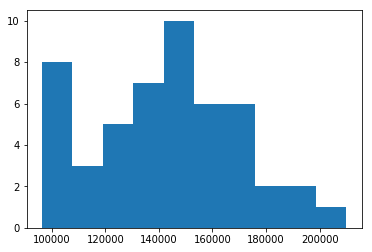

In [245]:
plt.hist(university['Mid-Career 90th Percentile Salary'])
plt.show()

The histogram below attempts to show the range of salaries for 50 different careers during their mid-career time period. I noticed that the 25th and 75th percentiles are much closer in value to the 10th percentile than to the 90th percentile. Observe how the top range for the 75th percentile ends around $140,000 while the 90th percentile extends over $200,000. 

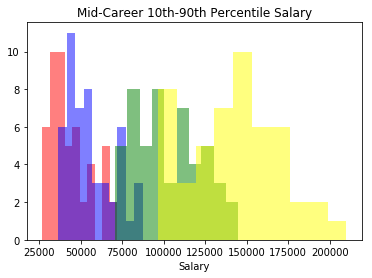

In [9]:
w = university["Mid-Career 10th Percentile Salary"]
x = university["Mid-Career 25th Percentile Salary"]
y = university["Mid-Career 75th Percentile Salary"]
z = university["Mid-Career 90th Percentile Salary"]
plt.hist(w, normed=False, color='red', alpha=.5)
plt.hist(x, normed=False, color='blue', alpha=.5)
plt.hist(y, normed=False, color='green', alpha=.5)
plt.hist(z, normed=False, color='yellow', alpha=.5)
plt.title('Mid-Career 10th-90th Percentile Salary')
plt.xlabel('Salary')
plt.show()

The basic bar graph below shows the median salaries for 50 separate undergraduate majors. It is noticible that the majority of salaries begin around $40,000. However, there are some consistent careers that start closer to $60,000. Can we isolate these majors? 

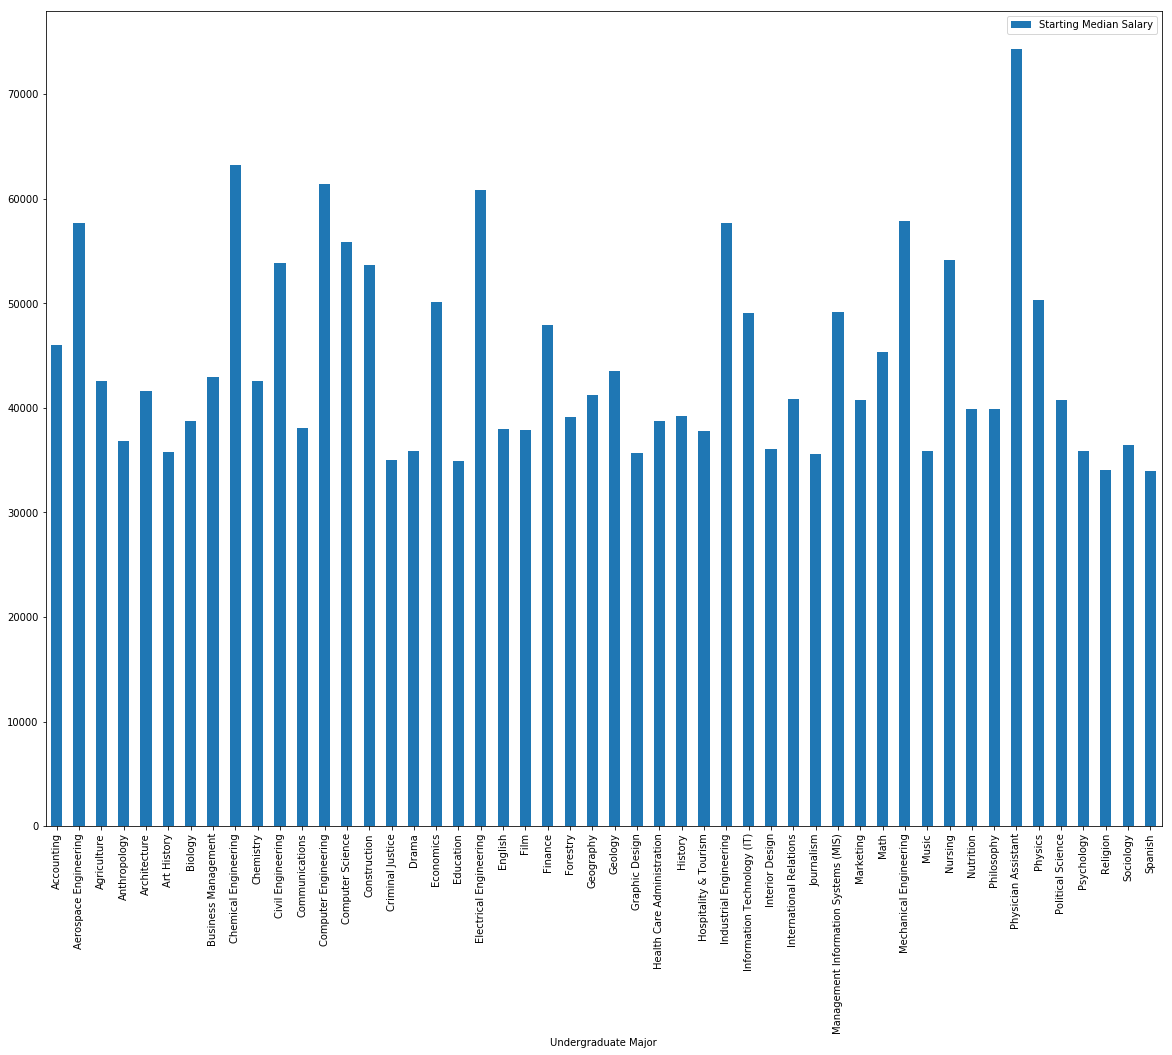

In [25]:
university.plot.bar(x="Undergraduate Major", y = "Starting Median Salary", figsize=(20,15))
plt.show()

Here are the eight majors that have a starting median salary that is greater than or equal to $50,000. As you can see six out of eight of them are a form of Engineering.

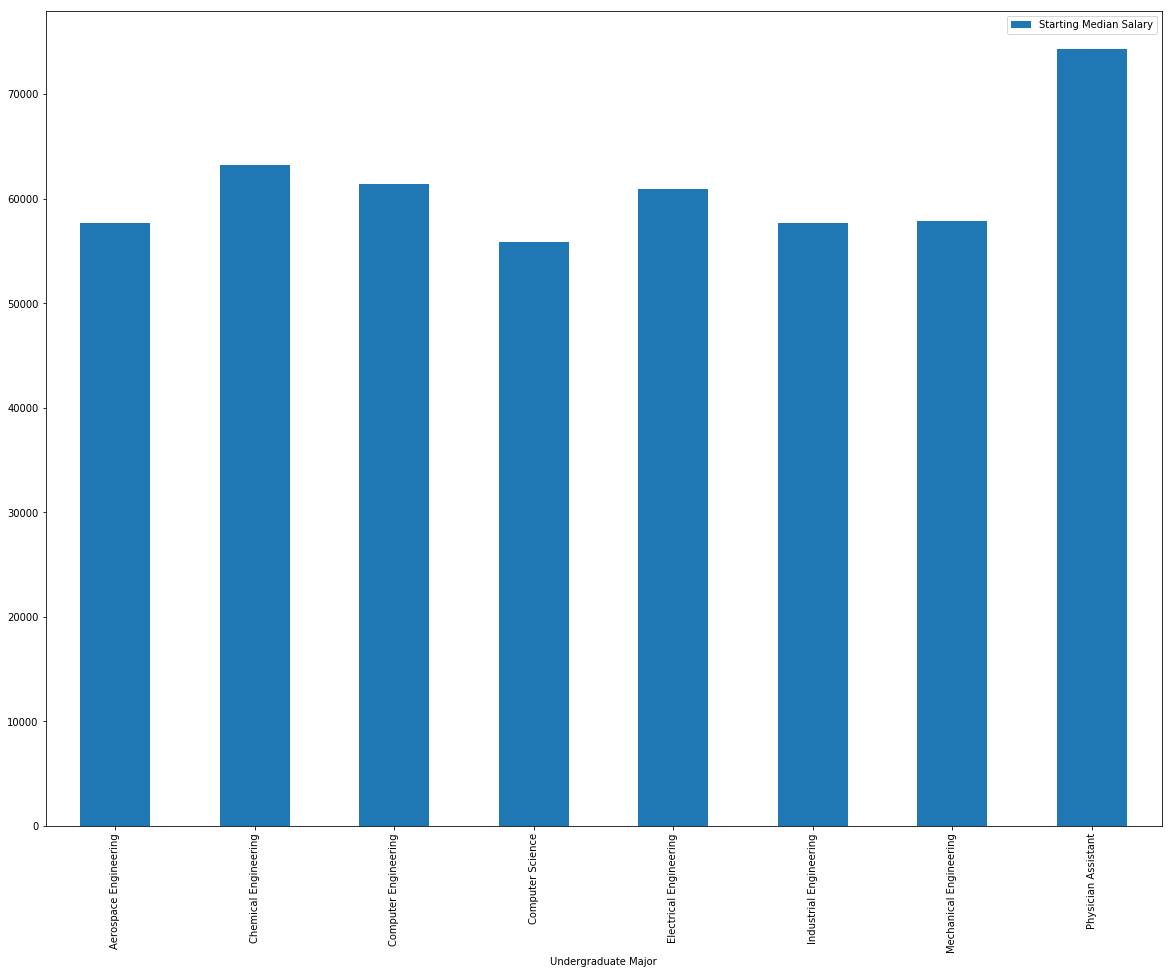

In [174]:
Higher_pay = university[university["Starting Median Salary"]>=55000]
Higher_pay.plot.bar(x="Undergraduate Major", y = "Starting Median Salary", figsize=(20,15))
plt.show()

This last bargraph compares those eight majors with the highest starting median salary to the majors that later have the highest mid-career median salary. To be included the mid-career median salaries were greater than $90,000. All the previous eight degrees are on this graph and again seven of the twelve majors are a form of Engineering. 

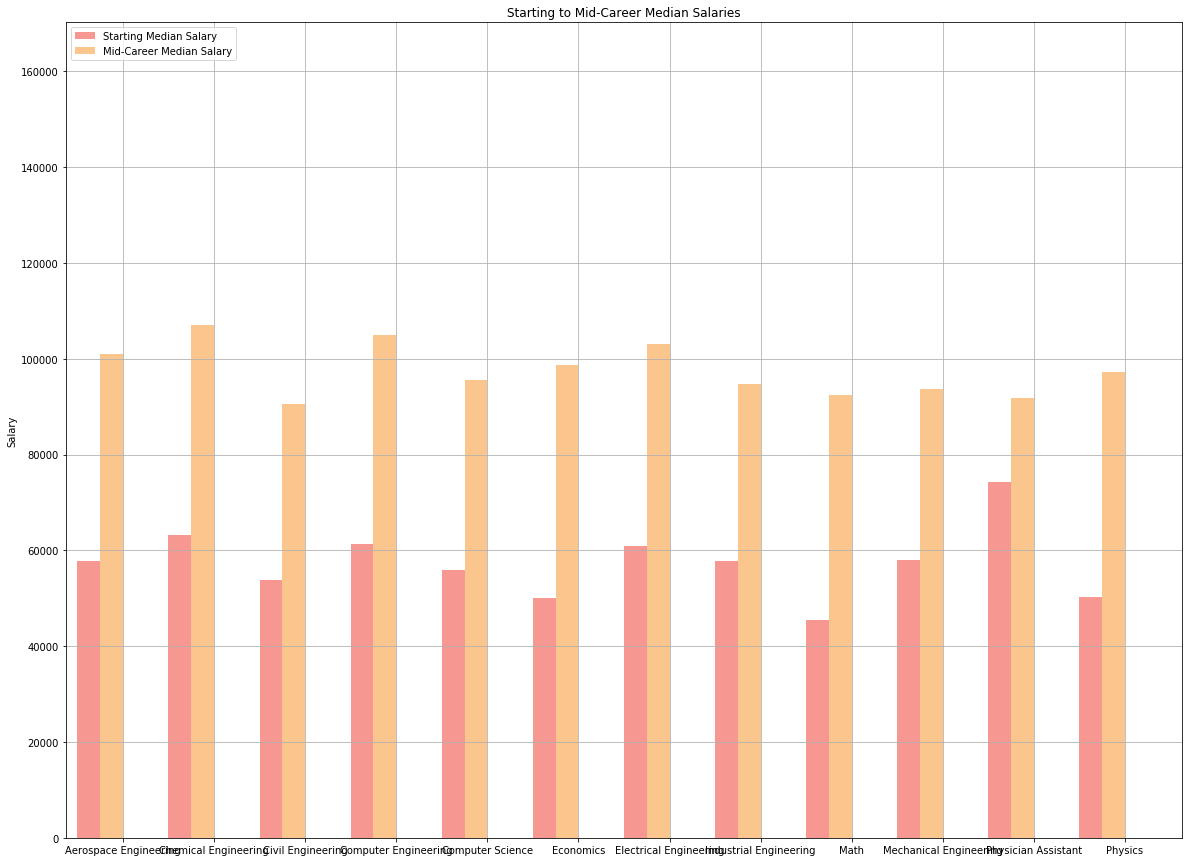

In [244]:
raw_data = university[university["Mid-Career Median Salary"]>=90000]

df = pd.DataFrame(raw_data, columns = ['Undergraduate Major', 'Starting Median Salary', 'Mid-Career Median Salary'])

pos = list(range(len(df['Undergraduate Major'])))
width = 0.25

fig, ax = plt.subplots(figsize=(20,15))

plt.bar(pos,
        #using df['Starting Median Salary'] data,
        df['Starting Median Salary'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the Undergraduate Major
        label=df['Undergraduate Major'])

plt.bar([p + width for p in pos],
        #using df['Mid-Career Median Salary'] data,
        df['Mid-Career Median Salary'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E')
        
# Set the y axis label
ax.set_ylabel('Salary')

# Set the chart's title
ax.set_title('Starting to Mid-Career Median Salaries')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Undergraduate Major'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Starting Median Salary'] + df['Mid-Career Median Salary'])] )

# Adding the legend and showing the plot
plt.legend(['Starting Median Salary', 'Mid-Career Median Salary'], loc='upper left')
plt.grid()
plt.show()